## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
from keras.layers import Dropout
import itertools
import matplotlib.pyplot as plt
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5, 0.75]
NEURONPLAN = [[512, 256, 128, 64 ,32], [512, 256, 128, 64], [512, 256, 128]]

In [7]:
results = {}
for exp, plan in itertools.product(Dropout_EXP, NEURONPLAN):
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=plan ,drp_ratio=exp)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "exp-dropout-%f-depth-%d" % (exp, len(plan))
    results[exp_name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________

50000/50000 [==============================] - 10s 207us/step - loss: 1.8075 - acc: 0.3294 - val_loss: 1.7579 - val_acc: 0.36611 - acc - ETA: 1s - loss: 1.808
Epoch 20/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.8034 - acc: 0.3340 - val_loss: 1.7458 - val_acc: 0.3600
Epoch 21/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.8019 - acc: 0.3344 - val_loss: 1.7280 - val_acc: 0.3762
Epoch 22/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.7887 - acc: 0.3376 - val_loss: 1.7151 - val_acc: 0.3746
Epoch 23/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.7920 - acc: 0.3408 - val_loss: 1.7158 - val_acc: 0.3801
Epoch 24/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.7849 - acc: 0.3447 - val_loss: 1.7073 - val_acc: 0.3787
Epoch 25/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.7841 - acc: 0.3450 - val_loss: 1.7565 - val_acc: 0.3647
E

50000/50000 [==============================] - 11s 212us/step - loss: 1.6803 - acc: 0.3934 - val_loss: 1.6095 - val_acc: 0.4321
Epoch 16/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.6702 - acc: 0.3979 - val_loss: 1.5809 - val_acc: 0.4384
Epoch 17/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.6725 - acc: 0.3935 - val_loss: 1.5699 - val_acc: 0.4479
Epoch 18/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.6557 - acc: 0.4043 - val_loss: 1.5846 - val_acc: 0.4460
Epoch 19/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.6447 - acc: 0.4065 - val_loss: 1.5765 - val_acc: 0.4419
Epoch 20/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.6458 - acc: 0.4084 - val_loss: 1.5957 - val_acc: 0.4397
Epoch 21/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.6421 - acc: 0.4057 - val_loss: 1.5764 - val_acc: 0.4322
Epoch 22/50
50000/50000 [=======

50000/50000 [==============================] - 11s 218us/step - loss: 1.6359 - acc: 0.4120 - val_loss: 1.5472 - val_acc: 0.4552
Epoch 14/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.6236 - acc: 0.4153 - val_loss: 1.5645 - val_acc: 0.4438
Epoch 15/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.6196 - acc: 0.4189 - val_loss: 1.5413 - val_acc: 0.4625
Epoch 16/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.6062 - acc: 0.4235 - val_loss: 1.5497 - val_acc: 0.4612
Epoch 17/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.6030 - acc: 0.4219 - val_loss: 1.5378 - val_acc: 0.4565
Epoch 18/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.5972 - acc: 0.4275 - val_loss: 1.5561 - val_acc: 0.4464
Epoch 19/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.5887 - acc: 0.4291 - val_loss: 1.5140 - val_acc: 0.4644
Epoch 20/50
50000/50000 [=======

50000/50000 [==============================] - 14s 285us/step - loss: 2.2293 - acc: 0.1368 - val_loss: 2.2197 - val_acc: 0.1509
Epoch 8/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.2273 - acc: 0.1384 - val_loss: 2.1905 - val_acc: 0.1571
Epoch 9/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.2321 - acc: 0.1393 - val_loss: 2.1586 - val_acc: 0.1810
Epoch 10/50
50000/50000 [==============================] - 12s 243us/step - loss: 2.2289 - acc: 0.1368 - val_loss: 2.2014 - val_acc: 0.1607
Epoch 11/50
50000/50000 [==============================] - 10s 208us/step - loss: 2.2291 - acc: 0.1382 - val_loss: 2.2066 - val_acc: 0.1501
Epoch 12/50
50000/50000 [==============================] - 14s 286us/step - loss: 2.2262 - acc: 0.1394 - val_loss: 2.1750 - val_acc: 0.1722
Epoch 13/50
50000/50000 [==============================] - 11s 216us/step - loss: 2.2251 - acc: 0.1382 - val_loss: 2.2069 - val_acc: 0.1459
Epoch 14/50
50000/50000 [=========

50000/50000 [==============================] - 12s 241us/step - loss: 2.2015 - acc: 0.1492 - val_loss: 2.1217 - val_acc: 0.1865
Epoch 4/50
50000/50000 [==============================] - 12s 250us/step - loss: 2.1588 - acc: 0.1621 - val_loss: 2.1145 - val_acc: 0.2092
Epoch 5/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.1343 - acc: 0.1690 - val_loss: 2.1137 - val_acc: 0.1896
Epoch 6/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.1178 - acc: 0.1790 - val_loss: 2.0997 - val_acc: 0.2043
Epoch 7/50
50000/50000 [==============================] - 10s 208us/step - loss: 2.1050 - acc: 0.1871 - val_loss: 2.0551 - val_acc: 0.2093
Epoch 8/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.0973 - acc: 0.1875 - val_loss: 2.0993 - val_acc: 0.1927
Epoch 9/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.0902 - acc: 0.1928 - val_loss: 2.0988 - val_acc: 0.2120
Epoch 10/50
50000/50000 [=============

50000/50000 [==============================] - 13s 255us/step - loss: 2.2418 - acc: 0.1533 - val_loss: 2.0799 - val_acc: 0.2402
Epoch 2/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.1171 - acc: 0.1897 - val_loss: 2.0630 - val_acc: 0.2628
Epoch 3/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.0870 - acc: 0.1985 - val_loss: 2.0577 - val_acc: 0.2285
Epoch 4/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.0782 - acc: 0.2024 - val_loss: 2.0875 - val_acc: 0.2341
Epoch 5/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.0688 - acc: 0.2045 - val_loss: 2.0295 - val_acc: 0.2620
Epoch 6/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.0592 - acc: 0.2113 - val_loss: 2.0589 - val_acc: 0.2449
Epoch 7/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.0553 - acc: 0.2113 - val_loss: 1.9957 - val_acc: 0.2613
Epoch 8/50
50000/50000 [================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 281us/step - loss: 2.7817 - acc: 0.1002 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.3027 - acc: 0.0967 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 12s 232us/step - loss: 2.3030 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 12s 233us/step - loss: 2.3027 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 12s 230us/step - loss: 2.3027 - acc: 0.0964 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 12s 231us/step - loss: 2.3027 - acc: 0.1005 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 12s 239us/step - loss: 2.3027 - acc: 0.0980 - val_loss: 2.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.4847 - acc: 0.0975 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 10s 207us/step - loss: 2.3035 - acc: 0.0995 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.3027 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.3027 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 11s 216us/step - loss: 2.3027 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.3028 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 12s 240us/step - loss: 2.3028 - acc: 0.0987 - val_loss: 2.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 232us/step - loss: 2.3904 - acc: 0.1003 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.3027 - acc: 0.0956 - val_loss: 2.3026 - val_acc: 0.0996
Epoch 3/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.3028 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.3027 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.3029 - acc: 0.0967 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 190us/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.3028 - acc: 0.0979 - val_loss: 2.3

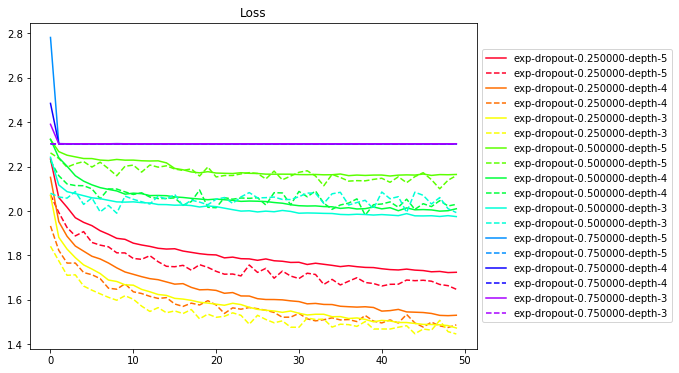

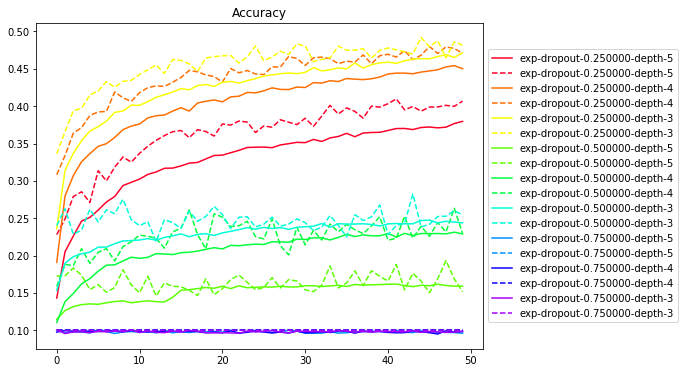

In [8]:
%matplotlib inline
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()